In [1]:
import warnings

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import squidpy as sq
import os

# Inital setting for plot size
from matplotlib import rcParams

In [5]:
df = pd.read_csv('sequencing_noise/gene_region.txt', sep='\t', index_col=0)
df

CRR1252507  CRR1252508  CRR1252509  CRR1252510  SRR18685810  \
RegionType                                                                
exon          0.560213    0.559229    0.800657    0.777004     0.965785   
intron        0.270693    0.250835    0.087959    0.099865     0.012254   
intergenic    0.169094    0.189936    0.111384    0.123132     0.021961   

            SRR18685811  SRR18685813  SRR18685814  SRR18685815  SRR18685816  \
RegionType                                                                    
exon           0.964814     0.966006     0.931008     0.937233     0.924274   
intron         0.013038     0.010324     0.016852     0.023228     0.023226   
intergenic     0.022148     0.023670     0.052139     0.039539     0.052501   

                  V1    visium  
RegionType                      
exon        0.904290  0.960530  
intron      0.022955  0.008776  
intergenic  0.072754  0.030694

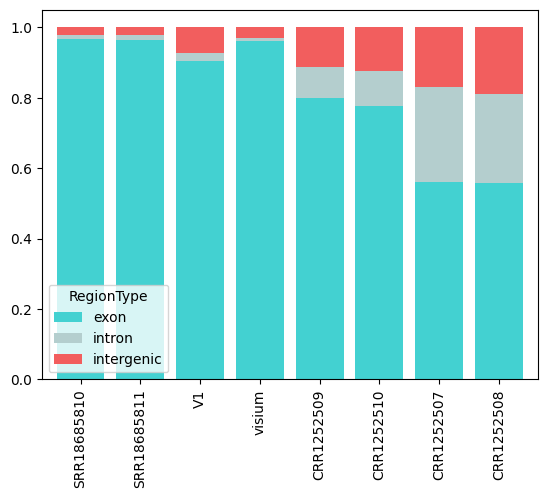

In [39]:
samples = [ 'SRR18685810', 'SRR18685811', 'V1', 'visium', 'CRR1252509', 'CRR1252510', 'CRR1252507', 'CRR1252508',]
df = df.loc[:, samples]
df.T.plot(kind='bar', stacked=True, width=0.8, color=["#43d1d1","#b4cece","#f25e5e"])
plt.savefig('exon_intron_ratio.pdf')

In [40]:
df2 = pd.read_csv('sequencing_noise/intergenic_chrom_state.txt', sep='\t', index_col=0)
df2

CRR1252507  CRR1252508  CRR1252509  CRR1252510  SRR18685810  \
Tss       0.637030    0.571628    0.405737    0.409125     0.153027   
Quies     0.056784    0.054446    0.257675    0.261218     0.241433   
Enh       0.283236    0.355060    0.242282    0.238646     0.286028   
Het       0.012324    0.009744    0.061178    0.059572     0.003300   
Tx        0.006814    0.005787    0.026700    0.025125     0.306555   
ReprPC    0.003812    0.003334    0.006429    0.006315     0.009656   

        SRR18685811  SRR18685813  SRR18685814  SRR18685815  SRR18685816  \
Tss        0.165827     0.149385     0.149560     0.172114     0.135834   
Quies      0.263473     0.254253     0.220688     0.241200     0.224212   
Enh        0.279581     0.257539     0.347570     0.323936     0.377337   
Het        0.004471     0.002908     0.003211     0.007509     0.004861   
Tx         0.274970     0.329126     0.274637     0.244117     0.248847   
ReprPC     0.011678     0.006789     0.004333     0.011124     0.008909   

        SRR18685817        V1    visium  
Tss        0.134622  0.142787  0.028827  
Quies      0.220129  0.070172  0.158940  
Enh        0.367560  0.764829  0.754033  
Het        0.004320  0.002456  0.005232  
Tx         0.264379  0.017768  0.047864  
ReprPC     0.008990  0.001989  0.005104

In [41]:
df2.index

Index(['Tss', 'Quies', 'Enh', 'Het', 'Tx', 'ReprPC'], dtype='object')

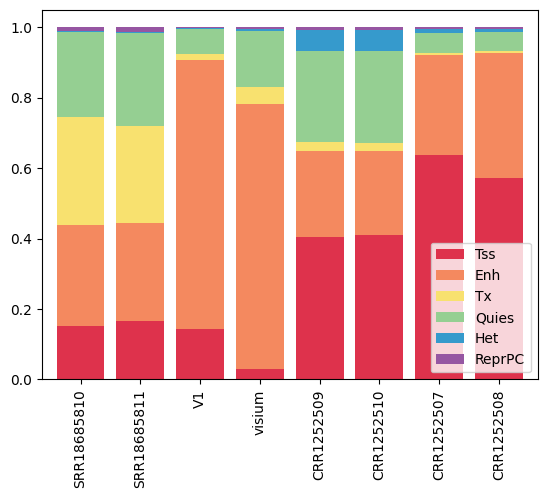

In [44]:
order = ['Tss', 'Enh', 'Tx', 'Quies', 'Het',  'ReprPC']
df2 = df2.loc[order, samples]

df2.T.plot(kind='bar', stacked=True, width=0.8, color=["#de324c","#f4895f","#f8e16f","#95cf92","#369acc","#9656a2"])
plt.savefig('intergenic_anno.pdf')